Machine Learning Project

For this project, you will analyze a dataset and then create a machine learning model based on that data.

You can use any machine learning algorithm you'd like (including ones we have not covered).

You will submit a link to your git repo containing:

a link, *.db file or text file containing your data. a jupyter notebook containing: your initial exploratory data analysis your initial findings, research goal and hypothesis explanation of the machine learning algorithm you're applying and why your results and any other metrics that quantify your results any other files needed (.gitignore, requirements.txt, etc.)

Research goal: In this project, I am looking to find the most important variables that contribute to wine quality. 
The project includes eleven attributes such as acidity, residual sugar, pH that may or may not contribute to wine quality.   There is data on both red and white wine using the same attributes for each. 

Hypthosis: For this project, I used linear regression in order to create a model that can effectively predict wine quality.

In [ ]:
Exploratory Analysis:

Initial analysis was conducted using the correlation function to see which features best correalate with wine quality.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error


In [19]:

red_wine = pd.read_csv('./winequality-red.csv', sep = ';')
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [30]:
red_wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [31]:
red_wine.sort_values("quality").max()

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

In [32]:
red_wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [33]:
red_wine.sort_values(by=['quality', 'volatile acidity'], ascending=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
517,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
1505,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.00,8
1120,7.9,0.540,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.10,8
828,7.8,0.570,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.70,8
455,11.3,0.620,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.40,8


In [34]:
red_wine.sort_values(by=['quality', 'alcohol'], ascending=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
517,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1469,7.3,0.980,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.7,3
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...
390,5.6,0.850,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
1120,7.9,0.540,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,8
455,11.3,0.620,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
588,5.0,0.420,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8


In [35]:
# 1 if the wine is good, 0 if the wine is bad

red_wine['quality-hot'] = red_wine['quality'].apply(lambda x: 1 if x > 5 else 0) 
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality-hot
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [82]:
red_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality-hot
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.218072


The correlation numbers between wine quality and the different features were low,but those numbers that were the highest were tested.

In [198]:
red_wine.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
quality-hot             0.848279
Name: quality, dtype: float64

In [ ]:
Since the numbers were so low, a logistic regression was attempted.

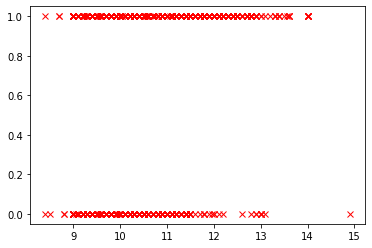

In [37]:
plt.plot( red_wine["alcohol"], red_wine["quality-hot"], 'rx')

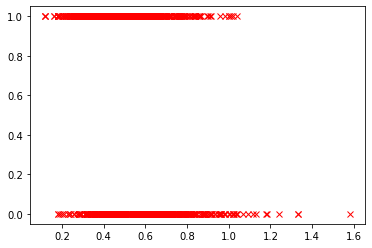

In [38]:
plt.plot( red_wine["volatile acidity"], red_wine["quality-hot"], 'rx')

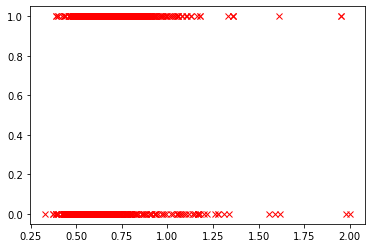

In [39]:
plt.plot( red_wine["sulphates"], red_wine["quality-hot"], 'rx')

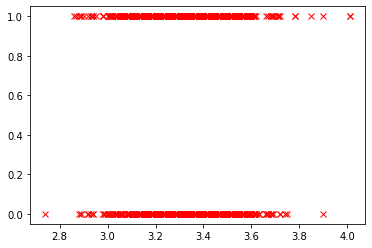

In [40]:
plt.plot( red_wine["pH"], red_wine["quality-hot"], 'rx')

Fixed acidity and citric acid appear to have a strong correlation with each other,
as well has density and fixed acidity.

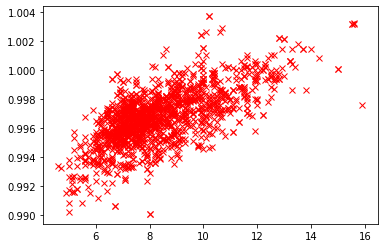

In [41]:
plt.plot(red_wine["fixed acidity"], red_wine["density"], 'rx')

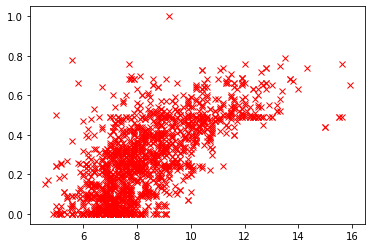

In [42]:
plt.plot(red_wine["fixed acidity"], red_wine["citric acid"], 'rx')

Alcohol, sulphates, and citric acid appeared to have the highest correlation with wine quality

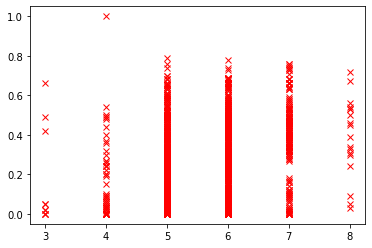

In [18]:
plt.plot( red_wine["quality"], red_wine["citric acid"], 'rx')

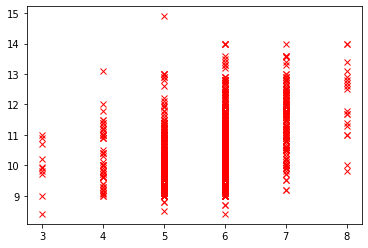

In [19]:
plt.plot( red_wine["quality"], red_wine["alcohol"], 'rx')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

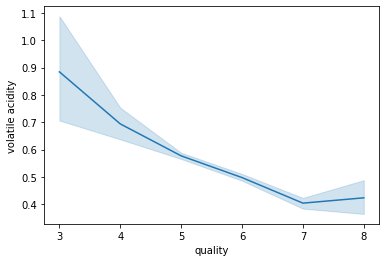

In [20]:
sns.lineplot(x="quality", y="volatile acidity", data=red_wine)

Several trials were conducted using the features with the highest correlation. Features were added by order of increasing correlation value. The scores from these models were low, making them not a good fit. 

In [20]:
#Trial #1
X = red_wine[['fixed acidity']]
y = red_wine['density']    #add more fe

# X = red_wine[['alcohol','sulphates']]
# y = red_wine['quality']    #add more features to x
#do mulitple linear regressions
#searching for the highest r^^2

In [21]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)


In [22]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train) 

LinearRegression()

In [24]:
reg.score(X_train, y_train)

0.4401437477071398

In [25]:
y_pred = reg.predict(X_test)  
y_pred

array([0.99832642, 0.99825326, 0.99722914, 0.99525405, 0.99649763,
       0.99737544, 0.99935054, 0.9975949 , 0.99576611, 0.99657078,
       0.99649763, 0.99825326, 0.99554665, 0.99818011, 0.99561981,
       0.99627817, 0.99898478, 0.99825326, 0.99591241, 0.9954735 ,
       0.99635132, 0.99913108, 0.99598556, 0.99591241, 0.99510774,
       0.99657078, 0.99605872, 0.99627817, 0.99657078, 0.99671708,
       0.99693653, 0.99730229, 0.99510774, 0.99569296, 0.9974486 ,
       0.99679023, 0.99766805, 0.9974486 , 0.99788751, 1.00161824,
       0.9953272 , 0.99642447, 0.99708284, 0.99605872, 0.99583926,
       0.99964314, 0.99598556, 0.99605872, 1.00037466, 0.99437623,
       0.99598556, 0.99671708, 0.99686338, 0.99591241, 0.9954735 ,
       0.99818011, 0.99861902, 0.9977412 , 0.99635132, 0.99810696,
       0.99679023, 0.99591241, 0.99935054, 0.9954735 , 0.99715599,
       0.99554665, 0.99583926, 0.9954735 , 0.99686338, 0.99569296,
       0.99737544, 0.9998626 , 0.99613187, 0.99627817, 0.99730

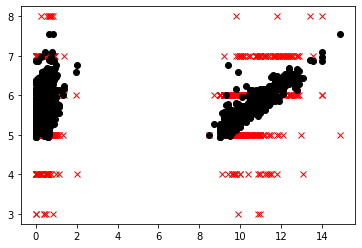

In [56]:
#Trial 1


plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, 'ko')
plt.show()

In [139]:
#Trial 1
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

MSE: 0.5221802099818659
MAE: 0.5501498194543163
MAPE: 0.10276489904263678


In [140]:
#Trial #2
X = red_wine[['alcohol','sulphates','citric acid']]
y = red_wine['quality'] 

In [141]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [142]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train) 

LinearRegression()

In [143]:
y_pred = reg.predict(X_test)  
y_pred

array([6.14856684, 5.70305963, 5.28386089, 5.70184556, 5.19340314,
       5.40287978, 5.65908948, 5.30372457, 5.88329455, 5.82540235,
       5.30998777, 6.09180355, 6.13154413, 6.4708398 , 5.62270111,
       5.25189172, 5.46576628, 6.15302765, 5.11515634, 5.88519531,
       5.54010608, 5.55880977, 5.69687352, 6.10064099, 5.78562628,
       5.15927356, 5.73336638, 6.26760604, 5.09548232, 5.54641186,
       5.46298819, 5.96329502, 5.3319551 , 5.79843362, 5.7043711 ,
       5.24292139, 5.50506466, 5.99273962, 5.19324187, 5.44783885,
       6.28424942, 5.24752929, 7.10243228, 5.25744694, 5.42878862,
       5.26463616, 5.86143979, 5.87588115, 5.13724333, 6.33614516,
       5.52010241, 6.08204717, 5.34014745, 6.62180656, 5.85336613,
       5.37147862, 6.10962551, 6.666864  , 5.0779687 , 6.27835844,
       6.51564469, 5.12068317, 6.66668853, 6.03425422, 6.29495311,
       5.68499833, 6.35658394, 5.10036406, 5.35841163, 5.50951838,
       6.77935394, 5.62068875, 5.05517372, 5.46810829, 6.28438

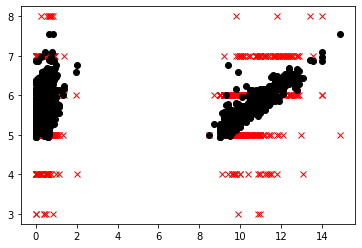

In [144]:
#Trial 2
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, 'ko')
plt.show()




In [145]:
#Trial 2
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

MSE: 0.5230620351063848
MAE: 0.552765018931789
MAPE: 0.1031131710868644


In [146]:
#Trial #3
X = red_wine[['alcohol','sulphates','citric acid', 'fixed acidity']]
y = red_wine['quality'] 

In [147]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [148]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train) 

LinearRegression()

In [149]:
y_pred = reg.predict(X_test)  
y_pred

array([6.19039357, 5.74311165, 5.35350261, 5.6943116 , 5.18563768,
       5.38003588, 5.74051432, 5.28470207, 5.88406965, 5.82751095,
       5.2826555 , 6.12689329, 5.99933581, 6.56931406, 5.6171038 ,
       5.23832619, 5.53269128, 6.15728032, 5.07297166, 5.8906637 ,
       5.55064165, 5.64700938, 5.65650215, 6.02480179, 5.7703158 ,
       5.15563474, 5.65987456, 6.24232166, 5.11736127, 5.55289716,
       5.53256089, 5.96716658, 5.25321914, 5.8143926 , 5.71091177,
       5.16414583, 5.55841923, 5.96635392, 5.24930662, 5.64456531,
       6.29404253, 5.21433318, 7.11087549, 5.19293754, 5.4248762 ,
       5.35423294, 5.80693998, 5.84376929, 5.23877124, 6.29397017,
       5.47534767, 6.05923829, 5.33328422, 6.57833819, 5.86195757,
       5.39940325, 6.16594417, 6.66247877, 5.08382933, 6.27542752,
       6.50313031, 5.11885951, 6.72484405, 6.03728475, 6.27337343,
       5.67294992, 6.2807897 , 5.08796264, 5.3745748 , 5.47732113,
       6.64956512, 5.68658007, 5.04148176, 5.50351861, 6.30928

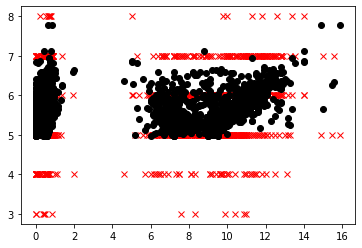

In [150]:
#Trial 3
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred,'ko')
plt.show()

In [151]:
#Trial 3
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

MSE: 0.5221802099818659
MAE: 0.5501498194543163
MAPE: 0.10276489904263678


In [152]:
#Trial #4
X = red_wine[['alcohol','sulphates','citric acid','fixed acidity','residual sugar']]
y = red_wine['quality'] 

In [153]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [154]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train) 

LinearRegression()

In [155]:
y_pred = reg.predict(X_test)  
y_pred

array([6.19875753, 5.75917927, 5.35299878, 5.69836212, 5.18837472,
       5.3849565 , 5.74263792, 5.29687445, 5.88953678, 5.83245265,
       5.29016278, 6.13843019, 6.01021218, 6.57681426, 5.56365771,
       5.24308047, 5.51890817, 6.15896546, 5.07753225, 5.89111016,
       5.55697125, 5.66619307, 5.66260696, 6.03218751, 5.77301371,
       5.16046342, 5.66716973, 6.24031165, 5.10422974, 5.5628438 ,
       5.52508929, 5.98128704, 5.2639512 , 5.82725612, 5.71123503,
       5.17541518, 5.54542639, 5.9778058 , 5.2513045 , 5.65220944,
       6.30416387, 5.22421698, 7.11328508, 5.20655188, 5.42809036,
       5.36460509, 5.75764702, 5.84269307, 5.25452206, 6.30832294,
       5.47752602, 6.06172594, 5.33837024, 6.57621949, 5.87011919,
       5.40406476, 6.14114368, 6.67483533, 5.08963557, 6.28418946,
       6.51152515, 5.11319122, 6.73658446, 6.04046354, 6.25712896,
       5.67370914, 6.29561525, 5.08887618, 5.3688785 , 5.47760095,
       6.63783439, 5.69213603, 5.02223327, 5.51071347, 6.31747

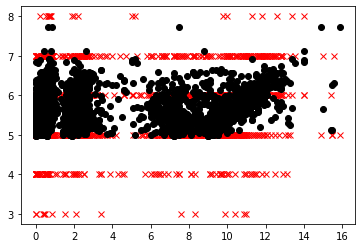

In [156]:
#Trial 4
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, 'ko')
plt.show()

In [157]:
#Trial 4
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

MSE: 0.5215994132880646
MAE: 0.5502233326270034
MAPE: 0.10272747915919961


In [158]:
#Trial #5
X = red_wine[['alcohol','sulphates','citric acid','fixed acidity','residual sugar','free sulfur dioxide']]
y = red_wine['quality']

In [159]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [160]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train) 

LinearRegression()

In [161]:
y_pred = reg.predict(X_test)  
y_pred

array([6.19963298, 5.75634784, 5.35142766, 5.69825521, 5.18880093,
       5.38397609, 5.74252652, 5.29791091, 5.89021954, 5.83384246,
       5.29010871, 6.13927521, 6.00937676, 6.57612009, 5.56530706,
       5.24093465, 5.52013948, 6.16008739, 5.07912983, 5.88669356,
       5.55835789, 5.66664849, 5.66301259, 6.03131301, 5.77453329,
       5.15815381, 5.66846066, 6.24049795, 5.1060078 , 5.56154295,
       5.52485507, 5.98171062, 5.26555789, 5.82489987, 5.71194458,
       5.17596703, 5.54263088, 5.9761299 , 5.25233678, 5.65188621,
       6.305038  , 5.22406888, 7.11403209, 5.20751093, 5.42473446,
       5.36521008, 5.75928889, 5.84150052, 5.25366732, 6.30798768,
       5.47780865, 6.06069833, 5.33616678, 6.57530943, 5.87133274,
       5.40521996, 6.14174761, 6.67580483, 5.09078405, 6.28498747,
       6.51031562, 5.11356984, 6.7361243 , 6.03773413, 6.25887804,
       5.67338993, 6.29645885, 5.08971854, 5.36874113, 5.47917662,
       6.63681242, 5.69227137, 5.02104916, 5.51103856, 6.31765

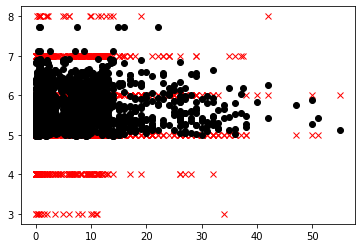

In [162]:
#Trial 5
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, 'ko')
plt.show()

In [163]:
#Trial 5
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

MSE: 0.5215571402324193
MAE: 0.5501942024072174
MAPE: 0.10272363227971336


In [168]:
#Trial #6
X = red_wine[['alcohol','sulphates','citric acid','fixed acidity','residual sugar','free sulfur dioxide','pH']]
y = red_wine['quality']

In [169]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [170]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train) 

LinearRegression()

In [171]:
y_pred = reg.predict(X_test)  
y_pred

array([6.20778442, 5.70250487, 5.33802655, 5.66910003, 5.20629038,
       5.37834041, 5.72959098, 5.30157451, 5.89113021, 5.82309481,
       5.29884014, 6.10284548, 6.01088688, 6.59437529, 5.56999562,
       5.25883015, 5.51512374, 6.13907415, 5.0825162 , 5.85411238,
       5.57037364, 5.68056306, 5.69907213, 6.01606401, 5.76611464,
       5.17120532, 5.66974835, 6.2385359 , 5.0978308 , 5.58645292,
       5.52769454, 6.00752446, 5.27933684, 5.85730632, 5.68515391,
       5.18182095, 5.52965986, 5.9607936 , 5.28351134, 5.61677172,
       6.31746627, 5.24858479, 7.1237186 , 5.18319933, 5.41768914,
       5.33692456, 5.7612811 , 5.83522532, 5.23770515, 6.22543966,
       5.4499055 , 6.05005074, 5.32413502, 6.59390111, 5.86763218,
       5.39896979, 6.17398602, 6.66143529, 5.08176079, 6.2811697 ,
       6.56641956, 5.07924737, 6.77324678, 6.06475816, 6.2801434 ,
       5.65226464, 6.29741302, 5.0658258 , 5.35523039, 5.47619783,
       6.71669637, 5.65752357, 5.06877378, 5.52742101, 6.32549

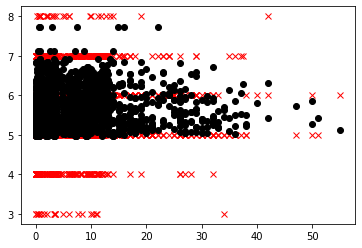

In [172]:
#Trial 6
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, 'ko')
plt.show()

In [173]:
#Trial 6
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

MSE: 0.5196266687058174
MAE: 0.549636086438367
MAPE: 0.10255054943651894


In [174]:
#Trial #7
X = red_wine[['alcohol','sulphates','citric acid','fixed acidity','residual sugar','free sulfur dioxide','pH','density']]
y = red_wine['quality']

newstudent718

In [175]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [176]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train) 

LinearRegression()

In [177]:
y_pred = reg.predict(X_test)  
y_pred

array([6.19617263, 5.75063776, 5.32095485, 5.7097594 , 5.19972675,
       5.39364438, 5.67973823, 5.28273057, 5.89137086, 5.79133561,
       5.29178795, 6.15936415, 5.98123989, 6.59776221, 5.60964279,
       5.27841602, 5.61260375, 6.03929123, 5.1056172 , 5.85033114,
       5.61052766, 5.75647962, 5.67350706, 6.02804306, 5.75669937,
       5.16195975, 5.62773953, 6.27234237, 5.06318443, 5.59884758,
       5.47639583, 6.08404669, 5.27974577, 5.83263684, 5.6735324 ,
       5.16668971, 5.47241865, 5.96931165, 5.31470782, 5.77425127,
       6.38206978, 5.22037462, 7.08605022, 5.17921617, 5.41465794,
       5.33736836, 5.74789967, 5.79774379, 5.26655985, 6.312536  ,
       5.43876422, 6.09812641, 5.2848212 , 6.595009  , 5.89464347,
       5.36822392, 6.03302245, 6.67300471, 5.09039474, 6.32854054,
       6.56137578, 5.08360415, 6.78603975, 6.0818304 , 6.27214371,
       5.6020067 , 6.3050454 , 5.08260827, 5.35764535, 5.46517247,
       6.62215243, 5.63916399, 5.01423596, 5.53165608, 6.36933

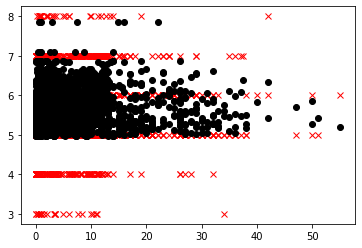

In [178]:
#Trial 7
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, 'ko')
plt.show()

In [179]:
#Trial 7
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

MSE: 0.5131964231477347
MAE: 0.5458841946012941
MAPE: 0.10196442269924448


In [180]:
#Trial 8
X = red_wine[['alcohol','sulphates','citric acid','fixed acidity','residual sugar','free sulfur dioxide','pH','density','total sulfur dioxide']]
y = red_wine['quality']

In [181]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [182]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train) 

LinearRegression()

In [183]:
y_pred = reg.predict(X_test)  
y_pred

array([6.19696903, 5.82977327, 5.18171682, 5.74781016, 5.07799638,
       5.21500322, 5.65867284, 5.32267988, 5.92908571, 5.83035499,
       5.21559551, 6.17731157, 6.06536218, 6.56552165, 5.67927055,
       5.08537226, 5.63054302, 6.06712381, 5.09166882, 5.97773714,
       5.62828361, 5.71751414, 5.71001681, 6.10246072, 5.7734557 ,
       5.14326616, 5.70025006, 6.20140253, 5.11322377, 5.43540202,
       5.47703479, 6.11257844, 5.28712993, 5.95172328, 5.70493721,
       5.04495057, 5.45160863, 5.9812686 , 5.29840069, 5.72305861,
       6.36778842, 4.91561699, 7.07931679, 5.21689872, 5.5656587 ,
       5.35643015, 5.62019919, 5.78100208, 5.26799163, 6.22779211,
       5.40931495, 6.13333025, 5.36963327, 6.64191944, 5.87324163,
       5.43526394, 6.12580071, 6.66268156, 5.0953155 , 6.34205296,
       6.64502448, 4.92937892, 6.80445112, 6.17495963, 6.32121585,
       5.66097545, 6.34285443, 5.01858782, 5.33160926, 5.39617238,
       6.81599321, 5.61150767, 4.99707916, 5.58438156, 6.38063

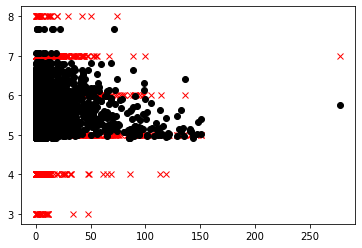

In [184]:
#Trial 8
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, 'ko')
plt.show()

In [185]:
#Trial 8
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

MSE: 0.49877866540984084
MAE: 0.5286021323450284
MAPE: 0.09875481245686464


In [186]:
#Trial #9
X = red_wine[['alcohol','sulphates','citric acid','fixed acidity','residual sugar','free sulfur dioxide','pH','density','total sulfur dioxide','chlorides']]
y = red_wine['quality']

In [187]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [188]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train) 

LinearRegression()

In [189]:
y_pred = reg.predict(X_test)  
y_pred

array([6.2956881 , 5.71275538, 5.12163123, 5.66907505, 5.10598033,
       5.23403036, 5.62455759, 5.36331206, 5.89003048, 5.85967091,
       5.22539893, 6.23344998, 6.1857705 , 6.5108088 , 5.72272928,
       5.05578035, 5.72018597, 6.11000689, 5.12992336, 5.87931336,
       5.48653994, 5.69627484, 5.19891396, 6.18023082, 5.78108308,
       5.13889144, 5.685528  , 6.23499707, 5.09607161, 5.57416628,
       5.42437386, 6.13996363, 5.28276239, 5.94527958, 5.76269149,
       5.03427881, 5.40410364, 6.04122958, 5.33232276, 5.73065915,
       6.31383509, 4.93101218, 7.08405523, 5.28391446, 5.59536755,
       5.30771737, 5.71695904, 5.77696521, 5.28629819, 6.17744339,
       5.4253982 , 6.20884743, 5.38453248, 6.66061388, 5.76681488,
       5.19664138, 6.07092633, 6.77244479, 5.08536299, 6.34549508,
       6.7029818 , 4.90249458, 6.7936232 , 6.21156799, 6.28642326,
       5.6589719 , 6.40949314, 5.04425324, 5.33899685, 5.04746706,
       6.16893369, 5.62483356, 5.01547166, 5.5460711 , 6.43231

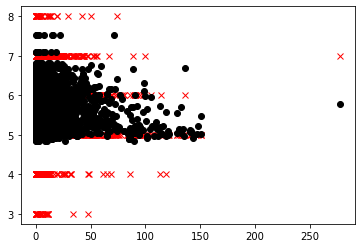

In [190]:
#Trial 9
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, 'ko')
plt.show()

In [191]:
#Trial 9

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

MSE: 0.4761941828705235
MAE: 0.5190430506983379
MAPE: 0.09681755048540204


In [14]:
#Trial #10
X = red_wine[['alcohol','sulphates','volatile acidity']]
y = red_wine['quality']
# X = red_wine[['alcohol','sulphates','citric acid','fixed acidity','residual sugar','free sulfur dioxide','pH','density','total sulfur dioxide','chlorides','volatile acidity']]
# y = red_wine['quality']

In [15]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [16]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train) 

LinearRegression()

In [17]:
reg.score(X_train, y_train)

0.3567247008001263

In [18]:
y_pred = reg.predict(X_test)  
y_pred

array([6.35135433, 5.72935668, 5.06560568, 5.22755539, 5.03745212,
       5.4511086 , 5.74613302, 5.42730214, 5.92647109, 5.46101416,
       5.03893459, 6.27328418, 6.37171602, 6.71840031, 5.64159237,
       5.18959657, 5.72186495, 6.19078753, 5.22984826, 5.9126196 ,
       5.63289817, 5.57629814, 5.4994823 , 6.17138744, 5.81258582,
       5.2317513 , 5.71770933, 6.59224557, 4.92314628, 5.44201375,
       5.2337345 , 6.10370386, 5.62862232, 6.00634399, 5.80480307,
       5.00386033, 5.49626834, 6.07858457, 5.1287826 , 5.76406983,
       6.1537215 , 5.3134068 , 6.97304253, 5.53749169, 5.33653262,
       5.25288385, 5.88841176, 6.04658561, 5.18014158, 6.45026771,
       5.46051344, 6.20260547, 5.43838929, 6.66329546, 5.44361836,
       5.44376731, 5.98072471, 6.42615009, 5.16096222, 6.3508042 ,
       6.59424891, 5.15086667, 6.5916753 , 6.03568898, 6.19111863,
       5.15402212, 6.57600113, 5.06025691, 5.59895609, 5.27916437,
       6.30990832, 5.63667425, 5.30225943, 5.53499824, 6.46086

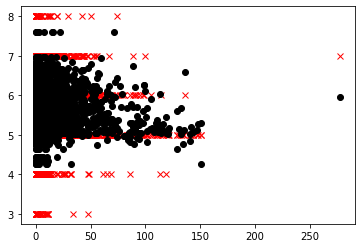

In [10]:
#Trial 10
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, 'ko')
plt.show()

In [11]:
reg.score(X_test, y_test)
reg.score()

0.322503679333382

In [197]:
#Trial 10
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

MSE: 0.46598749753628316
MAE: 0.520736407528048
MAPE: 0.09672827060922114


For white wine, similiar methods were applied. Many of the correlation values were negative, making the opportunity for creation of an accurate model difficult.

In [2]:
import pandas as pd

white_wine = pd.read_csv('./winequality-white.csv',sep = ";")
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [125]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [3]:
white_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


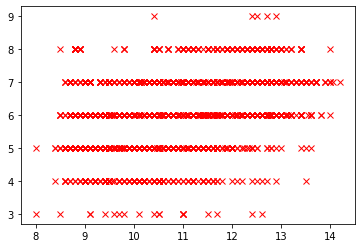

In [127]:
plt.plot( white_wine["alcohol"], white_wine["quality"], 'rx')

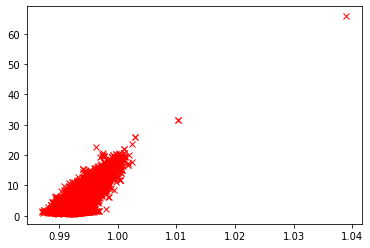

In [128]:
plt.plot( white_wine["density"], white_wine["residual sugar"], 'rx')

In [130]:
white_wine["density"] 

0       1.00100
1       0.99400
2       0.99510
3       0.99560
4       0.99560
         ...   
4893    0.99114
4894    0.99490
4895    0.99254
4896    0.98869
4897    0.98941
Name: density, Length: 4898, dtype: float64

In [ ]:
dataframe.drop( row_index, inplace = True)

In [4]:
white_wine = white_wine[white_wine["density"] < 1.01]
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [22]:
X = white_wine[['alcohol']]
y = white_wine['quality'] 

In [23]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [24]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train) 

LinearRegression()

In [25]:
reg.score(X_train, y_train)

0.18078926045381838

In [26]:
y_pred = reg.predict(X_test)  
y_pred

array([6.02126829, 5.47480616, 5.6569602 , ..., 6.6689271 , 6.23378134,
       6.74988446])

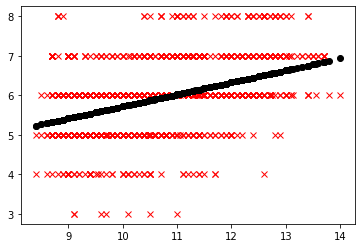

In [27]:
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, 'ko')
plt.show()

In [28]:
reg.score(X_train, y_train)

0.18078926045381838

In [ ]:
Results:

Overall, my results were inconclusive. None of the models that were taken had a good enough score to be an effective predictor of wine quality. In hindsight, a classification model such as Random Forest or decision trees could have been used to create a better model.